In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("credit_data.csv")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,income,debt,credit_history_length,late_payments,loan_amount,num_of_loans,age,default
0,141958,14216,10,2,47849,9,34,0
1,35795,56284,7,6,22858,3,31,0
2,20860,58043,20,11,57395,5,46,1
3,123694,36547,5,0,44758,9,62,0
4,148106,32471,1,3,59312,6,47,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   income                 1000 non-null   int64
 1   debt                   1000 non-null   int64
 2   credit_history_length  1000 non-null   int64
 3   late_payments          1000 non-null   int64
 4   loan_amount            1000 non-null   int64
 5   num_of_loans           1000 non-null   int64
 6   age                    1000 non-null   int64
 7   default                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


,income,debt,credit_history_length,late_payments,loan_amount,num_of_loans,age,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,85838.794000,30133.851000,12.147000,5.493000,41260.412000,5.070000,45.235000,0.332000
std,37817.509802,17362.376801,6.872308,3.418719,21659.648545,2.524574,14.004353,0.471167
min,20206.000000,1009.000000,1.000000,0.000000,5112.000000,1.000000,21.000000,0.000000
25%,53567.250000,14671.000000,6.000000,3.000000,23242.500000,3.000000,34.000000,0.000000
50%,86399.500000,29499.500000,12.000000,5.000000,40029.000000,5.000000,45.000000,0.000000
75%,117864.000000,45347.500000,18.000000,8.000000,60321.500000,7.000000,57.000000,1.000000
max,149981.000000,59918.000000,24.000000,11.000000,79965.000000,9.000000,69.000000,1.000000


In [4]:
df.isnull().sum()

income                   0
debt                     0
credit_history_length    0
late_payments            0
loan_amount              0
num_of_loans             0
age                      0
default                  0
dtype: int64

In [5]:
df["debt_to_income_ratio"] = df["debt"] / df["income"]
df["loan_to_income_ratio"] = df["loan_amount"] / df["income"]
df["payment_behavior"] = df["late_payments"] / (df["credit_history_length"] + 1)

df.head()

,income,debt,credit_history_length,late_payments,loan_amount,num_of_loans,age,default,debt_to_income_ratio,loan_to_income_ratio,payment_behavior
0,141958,14216,10,2,47849,9,34,0,0.100142,0.337064,0.181818
1,35795,56284,7,6,22858,3,31,0,1.572398,0.638581,0.750000
2,20860,58043,20,11,57395,5,46,1,2.782502,2.751438,0.523810
3,123694,36547,5,0,44758,9,62,0,0.295463,0.361845,0.000000
4,148106,32471,1,3,59312,6,47,0,0.219242,0.400470,1.500000


In [6]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (800, 10)
Test Shape: (200, 10)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    print("\n==============================")
    print(f"Model: {name}")
    print("==============================")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", auc)

    results[name] = auc



Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       132
           1       0.59      0.28      0.38        68

    accuracy                           0.69       200
   macro avg       0.65      0.59      0.59       200
weighted avg       0.67      0.69      0.65       200

ROC-AUC Score: 0.6964126559714794

Model: Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       132
           1       0.34      0.38      0.36        68

    accuracy                           0.54       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.55      0.54      0.54       200

ROC-AUC Score: 0.4979946524064171

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       132
           1       0.51  

In [10]:
results


{'Logistic Regression': 0.6964126559714794,
 'Decision Tree': 0.4979946524064171,
 'Random Forest': 0.653799019607843}

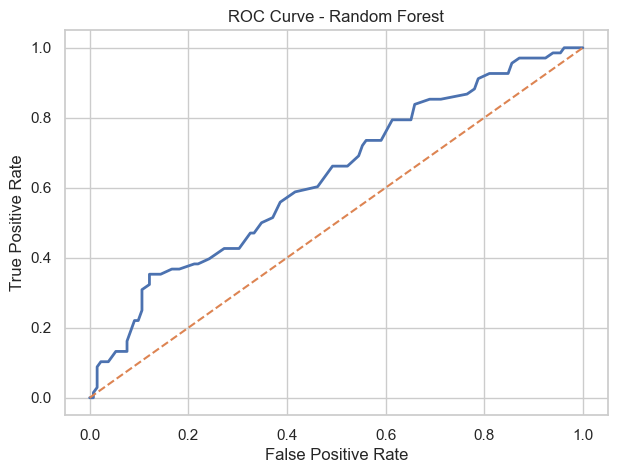

In [11]:
# --------------------------
# ROC CURVE FOR RANDOM FOREST
# --------------------------

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


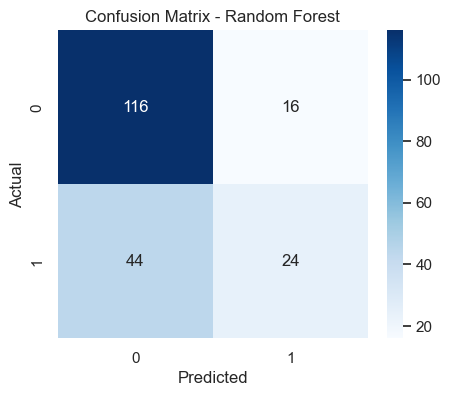

In [12]:
# --------------------------
# CONFUSION MATRIX
# --------------------------

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# --------------------------
# FINAL MODEL PERFORMANCE
# --------------------------

print("ROC-AUC Scores for All Models:")
for m, score in results.items():
    print(f"{m}: {score:.4f}")

best = max(results, key=results.get)
print("\nBest Model =", best)


ROC-AUC Scores for All Models:
Logistic Regression: 0.6964
Decision Tree: 0.4980
Random Forest: 0.6538

Best Model = Logistic Regression
